# Univariate linear regression with `sklearn`

Additional practice datasets:
- sklearn.datasets.load_boston()

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [61]:
#see what diabetes gives us
#it is a bunch object (dictionary like)
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [62]:
# what does the data attribute return?
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [63]:
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])
df.head() #seems like the data is normalize

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [64]:
df.shape

(442, 11)

In [65]:
# Let's drop everything except the age variable
columns_to_drop = list(df) #convert column names to list
columns_to_drop.remove('age')
columns_to_drop.remove('target')
columns_to_drop #contains all the column names to drop

['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [66]:
df = df.drop(columns=columns_to_drop)
df.head()

age  target
0  0.038076   151.0
1 -0.001882    75.0
2  0.085299   141.0
3 -0.089063   206.0
4  0.005383   135.0

In [67]:
#uses 200 as a random seed
df_age_train=df.sample(frac=0.8,random_state=200) 
df_age_test=df.drop(df_age_train.index)

#lets see the shape of our training/testing sets
print(df_age_train.shape,df_age_test.shape)

(354, 2) (88, 2)


In [76]:
#separate training df into X and Y features

# we reshape them from a 1 dimensional array (that is returned from df.values 
#so that we can pass them in as a 2 dimensional np array

age_train_x = df_age_train.age.values.reshape(-1, 1)  #X
age_train_y = df_age_train.target.values.reshape(-1, 1)  #Y

#separate test df into X and Y features
age_test_x = df_age_test.age.values.reshape(-1, 1)  #X
age_test_y = df_age_test.target.values.reshape(-1, 1)  #Y

age_train_x

array([[ 0.09619652],
       [-0.06000263],
       [ 0.02717829],
       [ 0.06350368],
       [-0.08179786],
       [-0.02730979],
       [ 0.01991321],
       [-0.02367725],
       [ 0.00175052],
       [ 0.06713621],
       [-0.02367725],
       [ 0.00175052],
       [ 0.02717829],
       [ 0.02717829],
       [ 0.01264814],
       [-0.00188202],
       [ 0.07440129],
       [-0.01641217],
       [-0.01641217],
       [-0.00551455],
       [ 0.04170844],
       [ 0.02717829],
       [-0.00551455],
       [-0.06363517],
       [ 0.01628068],
       [ 0.06713621],
       [-0.05273755],
       [-0.04183994],
       [ 0.02354575],
       [ 0.00538306],
       [ 0.02717829],
       [ 0.00175052],
       [-0.01641217],
       [-0.0854304 ],
       [-0.04183994],
       [ 0.03081083],
       [-0.10359309],
       [ 0.04897352],
       [ 0.11072668],
       [ 0.06350368],
       [ 0.11072668],
       [-0.04910502],
       [-0.00551455],
       [ 0.02354575],
       [-0.01641217],
       [ 0

Coefficients: 
 [[275.87937055]]
Intercept: 
 [150.262618]
Mean squared error: 5000.65
Variance score: 0.06


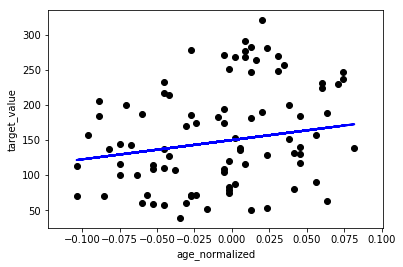

In [81]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(age_train_x, age_train_y)

# Make predictions using the testing set
age_pred_y = regr.predict(age_test_x)

# The coefficients i.e. the gradient
print('Coefficients: \n', regr.coef_)

#print the y intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error
# %.2f means represent the float at 2 dp
print("Mean squared error: %.2f"
      % mean_squared_error(age_test_y, age_pred_y))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(age_test_y, age_pred_y))

# Plot outputs
plt.scatter(age_test_x, age_test_y,  color='black')
plt.plot(age_test_x, age_pred_y, color='blue', linewidth=2)

plt.xticks()
plt.yticks()
plt.xlabel('age_normalized')
plt.ylabel('target_value')

plt.show()